# Fear Prediction with Audio and Visual Features and Low Level Cinematographic Features

The Mediaeval 2017 Emotional Impact of Movies Task includes the data in the emotional domain 
(valence - arousal  regression) and  fear ( binary classification).
We have displayed the valence and arousal of all the movies in the dataset.
Also the time of the movie where fear is present is specified with the value of the second.
According to the Russell's circumplex model we were expecting the "FEAR" to be appeared in the negative vallence, positive arousal part of the circumflex.
However in some movies, we can see that frightment exists in positive valence with negative arousal also.


In [1]:

import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import matplotlib.colors as colors


import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

import numpy as np
import pylab as pl
import re, fileinput
import os.path
import glob
import pickle
import sys


In [2]:
import numpy as np 
print(np.__version__) 
print(np.__path__)


1.13.3
['/home/yt/anaconda2/lib/python2.7/site-packages/numpy']


In [3]:
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import scipy
from scipy.stats import pearsonr


In [4]:
#Dev data
#movieNames = ['After_The_Rain','Attitude_Matters','Barely_legal_stories','Between_Viewings','Big_Buck_Bunny','Chatter','Cloudland','Damaged_Kung_Fu','Decay','Elephant_s_Dream','First_Bite','Full_Service','Islands','Lesson_Learned','Norm','Nuclear_Family','On_time','Origami','Parafundit','Payload','Riding_The_Rails','Sintel','Spaceman','Superhero','Tears_of_Steel','The_room_of_franz_kafka','The_secret_number','To_Claire_From_Sonny','Wanted','You_Again']

pathcontinuous = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/ContinuousLIRIS-ACCEDE/"
continuousAnnotationsFolder = pathcontinuous +'continuous-annotations/'
devdatacontinous =  pathcontinuous + "continuous-movies/"
pathcontfeatures = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Continuous/features-out/"

datahome = '/home/yt/Desktop/mediaeval2017'

med2017visualFeaturesfolder='/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Visual_features/MEDIAEVAL17-DevSet-Visual_features/features/'
med2017audiofolder='/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Audio_features/MEDIAEVAL17-DevSet-Audio_features/features/'
med2017annotationsFolder = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Valence_Arousal-annotations/MEDIAEVAL17-DevSet-Valence_Arousal-annotations/annotations/'
med2017fearFolder = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Fear-annotations/MEDIAEVAL17-DevSet-Fear-annotations/annotations/'
med2017dataFolder = devdatacontinous

### Test Data

med2017visualFeaturesfolderTest='/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-TestSet-Visual_features/MEDIAEVAL17-TestSet-Visual_features/visual_features/'
med2017audiofolderTest = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-TestSet-Audio_features/MEDIAEVAL17-TestSet-Audio_features/audio_features/'
med2017datafolderTest = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-TestSet-Data/MEDIAEVAL17-TestSet-Data/data/'

med2017testfeatures = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Continuous/features-out/"

facesfolder = '/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/dlibfaces/'


In [5]:
files = glob.glob(med2017datafolderTest+'*')
testmovieNames =[ f.split('/')[-1].replace('.mp4','') for f in sorted(files) ]

In [6]:
files = glob.glob(med2017dataFolder+'*')
movieNames =[ f.split('/')[-1].replace('.mp4','') for f in sorted(files) ]

In [7]:
movieNames,testmovieNames

(['After_The_Rain',
  'Attitude_Matters',
  'Barely_legal_stories',
  'Between_Viewings',
  'Big_Buck_Bunny',
  'Chatter',
  'Cloudland',
  'Damaged_Kung_Fu',
  'Decay',
  'Elephant_s_Dream',
  'First_Bite',
  'Full_Service',
  'Islands',
  'Lesson_Learned',
  'Norm',
  'Nuclear_Family',
  'On_time',
  'Origami',
  'Parafundit',
  'Payload',
  'Riding_The_Rails',
  'Sintel',
  'Spaceman',
  'Superhero',
  'Tears_of_Steel',
  'The_room_of_franz_kafka',
  'The_secret_number',
  'To_Claire_From_Sonny',
  'Wanted',
  'You_Again'],
 ['MEDIAEVAL17_00',
  'MEDIAEVAL17_01',
  'MEDIAEVAL17_02',
  'MEDIAEVAL17_03',
  'MEDIAEVAL17_04',
  'MEDIAEVAL17_05',
  'MEDIAEVAL17_06',
  'MEDIAEVAL17_07',
  'MEDIAEVAL17_08',
  'MEDIAEVAL17_09',
  'MEDIAEVAL17_10',
  'MEDIAEVAL17_11',
  'MEDIAEVAL17_12',
  'MEDIAEVAL17_13'])

In [37]:
def getfacedf(moviename):
    filename = facesfolder + moviename +'.mp4-faces.txt'
    df = pd.read_csv(filename,sep=' ')
    
    df['topratio'] = df['top']/df['hframe'] 
    df['bottomratio'] = df['bottom']/df['hframe'] 
    df['leftratio'] = df['left']/df['wframe'] 
    df['rightratio'] = df['right']/df['wframe']
    df['fheight'] =  (df['bottom']-df['top'])/df['hframe'] 
    df['fwidth'] =  (df['right']-df['left'])/df['wframe'] 
    df['farea'] = df['fheight']*df['fwidth']
    df['fcx'] = df['fheight'] / 2
    df['fcy'] = df['fwidth'] / 2
    
    #df[ df['noface']>0]
    cols = ['noface','fcx','fcy','topratio','bottomratio','leftratio','rightratio','fheight','fwidth','farea']
    return df[cols]

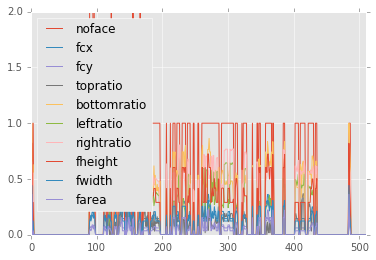

In [67]:
df= getfacedf('After_The_Rain')
df= getfacedf('Attitude_Matters')
df= getfacedf('Chatter')
t = df #[df['noface']>0][['fcx','fcy']]
t.plot()

In [8]:
fpsMovie = [['After_The_Rain',23.976],
            ['Attitude_Matters',29.97],
            ['Barely_legal_stories',23.976],
            ['Between_Viewings',25],
            ['Big_Buck_Bunny',24],
            ['Chatter',24],
                ['Cloudland',25],
                ['Damaged_Kung_Fu',25],
                ['Decay',23.976],
                ['Elephant_s_Dream',24],
                ['First_Bite',25],
                ['Full_Service',29.97],
                ['Islands',23.976],
                ['Lesson_Learned',29.97],
                ['Norm',25],
                ['Nuclear_Family',23.976],
                ['On_time',30],
                ['Origami',24],
                ['Parafundit',24],
                ['Payload',25],
                ['Riding_The_Rails',23.976],
                ['Sintel',24],
                ['Spaceman',23.976],
                ['Superhero',29.97],
                ['Tears_of_Steel',24],
                ['The_room_of_franz_kafka',29.786],
                ['The_secret_number',23.976],
                ['To_Claire_From_Sonny',23.976],
                ['Wanted',25],
                ['You_Again',29.97]]

contmoviesfps = pd.DataFrame(fpsMovie,columns=['name','fps'])
contmoviesfps.set_index('name', inplace=True)
contmoviesfps.index.name = None
#contmoviesfps['After_The_Rain']

In [9]:
#contmoviesfps

,fps
After_The_Rain,23.976
Attitude_Matters,29.970
Barely_legal_stories,23.976
Between_Viewings,25.000
Big_Buck_Bunny,24.000
Chatter,24.000
Cloudland,25.000
Damaged_Kung_Fu,25.000
Decay,23.976
Elephant_s_Dream,24.000


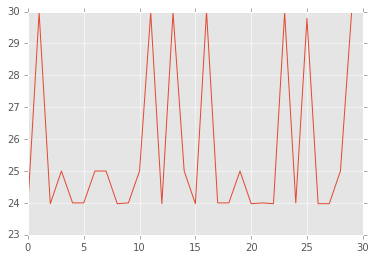

In [10]:
plt.plot(range(contmoviesfps.shape[0]), contmoviesfps['fps'])
#contmoviesfps.plot()

In [11]:
contmoviesfps['f'] = np.round(contmoviesfps['fps'])
#contmoviesfps

In [12]:
def getfps(movname):
    return contmoviesfps.loc[movname ]['f']

In [13]:
print contmoviesfps[ contmoviesfps.index == 'You_Again' ]['f']
print getfps('You_Again')

You_Again    30.0
Name: f, dtype: float64
30.0


In [14]:
movgroups_wodecay = {
    0:['You_Again','Damaged_Kung_Fu','The_secret_number','Spaceman'],
    1:['Cloudland','Origami','Riding_The_Rails','Tears_of_Steel','Sintel'],
    2:['On_time','Elephant_s_Dream','Norm','Big_Buck_Bunny','Chatter','Full_Service'],
    3:['Islands','To_Claire_From_Sonny','Nuclear_Family','After_The_Rain','Parafundit'],
    4:['The_room_of_franz_kafka','Attitude_Matters','Lesson_Learned','Superhero'],
    5:['First_Bite','Wanted','Between_Viewings','Barely_legal_stories','Payload']
}

movgroups = {
    0:['You_Again','Damaged_Kung_Fu','The_secret_number','Spaceman'],
    1:['Cloudland','Origami','Riding_The_Rails','Tears_of_Steel','Sintel'],
    2:['On_time','Elephant_s_Dream','Norm','Big_Buck_Bunny','Chatter','Full_Service'],
    3:['Islands','To_Claire_From_Sonny','Nuclear_Family','After_The_Rain','Parafundit'],
    4:['The_room_of_franz_kafka','Attitude_Matters','Lesson_Learned','Superhero'],
    5:['First_Bite','Wanted','Between_Viewings','Barely_legal_stories','Payload'],
    6:['Decay']
}

mov2groups = {
    0:['Decay'],
    1:['You_Again','Damaged_Kung_Fu','The_secret_number','Spaceman'],
    2:['Cloudland','Origami','Riding_The_Rails','Tears_of_Steel','Sintel'],
    3:['On_time','Elephant_s_Dream','Norm','Big_Buck_Bunny','Chatter','Full_Service'],
    4:['Islands','To_Claire_From_Sonny','Nuclear_Family','After_The_Rain','Parafundit'],
    5:['The_room_of_franz_kafka','Attitude_Matters','Lesson_Learned','Superhero'],
    6:['First_Bite','Wanted','Between_Viewings','Barely_legal_stories','Payload'],
}


def gettraintestmovielist(mlist,groups=movgroups):
    testlist = groups[mlist]
    trainlist =[]
    for idx, group in enumerate(groups):
        if idx != mlist:
            for g in groups[idx]:
                trainlist.append(g)
    return trainlist, testlist

''' 
def gettraintest2movielist(foldno,groups=mov2groups):
    if foldno==1:
        mlist=[1,2]
    elif foldno==2:
        mlist=[3,4]
    elif foldno==3:
        mlist=[5,6]
    elif foldno==4:
        mlist=[2,3]
    elif foldno==5:
        mlist=[4,5]
    else:
        mlist=[]
    
    testlist = [] 
    for i in mlist:
        for f in groups[i]:
            testlist.append(f)
            
    trainlist =[]
    for idx, group in enumerate(groups):
        for f in groups[idx]:
            if f not in testlist:
                trainlist.append(f)
                
    return trainlist, testlist
'''

' \ndef gettraintest2movielist(foldno,groups=mov2groups):\n    if foldno==1:\n        mlist=[1,2]\n    elif foldno==2:\n        mlist=[3,4]\n    elif foldno==3:\n        mlist=[5,6]\n    elif foldno==4:\n        mlist=[2,3]\n    elif foldno==5:\n        mlist=[4,5]\n    else:\n        mlist=[]\n    \n    testlist = [] \n    for i in mlist:\n        for f in groups[i]:\n            testlist.append(f)\n            \n    trainlist =[]\n    for idx, group in enumerate(groups):\n        for f in groups[idx]:\n            if f not in testlist:\n                trainlist.append(f)\n                \n    return trainlist, testlist\n'

In [15]:
gettraintestmovielist(2)


(['You_Again',
  'Damaged_Kung_Fu',
  'The_secret_number',
  'Spaceman',
  'Cloudland',
  'Origami',
  'Riding_The_Rails',
  'Tears_of_Steel',
  'Sintel',
  'Islands',
  'To_Claire_From_Sonny',
  'Nuclear_Family',
  'After_The_Rain',
  'Parafundit',
  'The_room_of_franz_kafka',
  'Attitude_Matters',
  'Lesson_Learned',
  'Superhero',
  'First_Bite',
  'Wanted',
  'Between_Viewings',
  'Barely_legal_stories',
  'Payload',
  'Decay'],
 ['On_time',
  'Elephant_s_Dream',
  'Norm',
  'Big_Buck_Bunny',
  'Chatter',
  'Full_Service'])

## Fear Annotations

In [16]:
def getFearDf(movname):
    filename = os.path.join(med2017fearFolder, movname + '-MEDIAEVAL2017-fear.txt')
    annotation = np.genfromtxt(filename, names=True, delimiter='\t', dtype=None)
    df = pd.DataFrame(annotation)
    return df


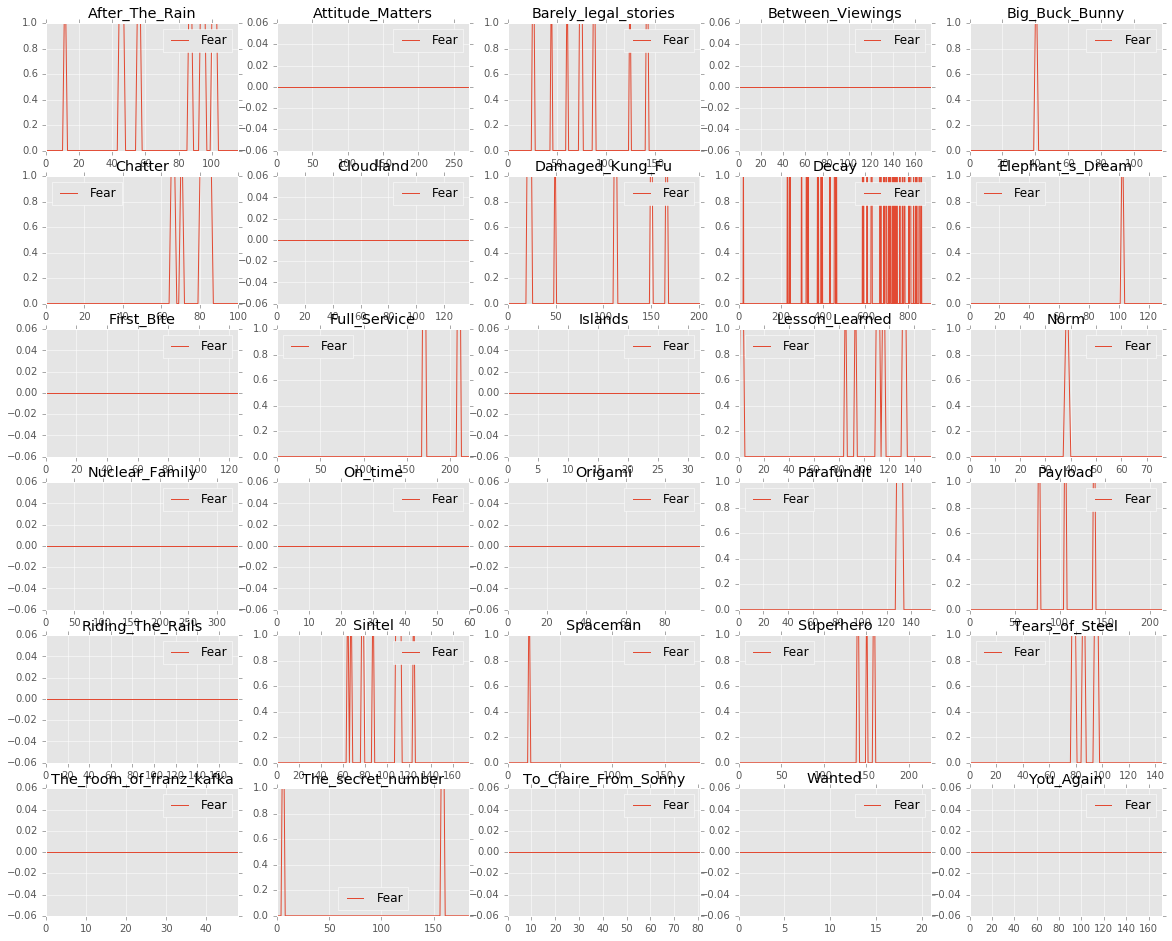

In [17]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)
    df = getFearDf(mov)
    df[['Fear']].plot(ax=plt.gca(),title=mov)

## Valence Arousal Annotations

In [18]:
def getAnnotationDf(movname,folder=med2017annotationsFolder):
    filename = os.path.join(folder, movname + '-MEDIAEVAL2017-valence_arousal.txt')
    annotation = np.genfromtxt(filename, names=True, delimiter='\t', dtype=None)
    df = pd.DataFrame(annotation)
    return df

In [19]:
df = getAnnotationDf(movieNames[0])
#df.hist(alpha=0.5,bins=50)

In [20]:
#df.head()
#df.describe()
df = getAnnotationDf('Islands')
df.head(2)

,Id,Time,MeanValence,MeanArousal
0,0,0,0.098658,-0.098712
1,1,5,0.137632,-0.108957


# Shot boundary detections

In [21]:
def getShotDf(movie,folder=pathcontfeatures):
    filename =  folder + movie + '.mp4-shot-times.txt'
    shotarray = np.genfromtxt(filename, delimiter=' ',dtype=int)
    df = pd.DataFrame(shotarray,columns=['cut'])
    fps=getfps(movie)
    fps
    df['time'] = df['cut']*1. / fps
    return df

In [22]:
x = getShotDf('Sintel')['time']
df = getAnnotationDf('Sintel')
getfps('Sintel')

24.0

In [23]:
len(x),df.shape

(227, (176, 4))

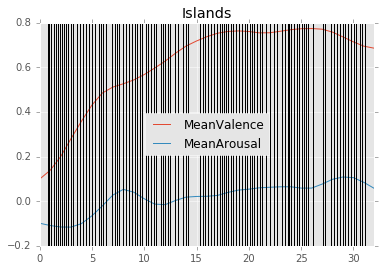

In [24]:
#plt.scatter(x,np.ones(len(x)))
movname = 'Islands'
df = getAnnotationDf(movname)
df[['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=movname)
cuts = getShotDf(movname)['time']
for i in range(len(cuts)):
    x=cuts[i]/5
    plt.axvline(x,linestyle='-',color='black')

#plt.title('AV plor with shot times')
#plt.tight_layout()

In [25]:
#df.head(10)
#cuts.head()

In [26]:
#tin = pd.DataFrame(np.arange(100),columns=['Id'])
#tin['Time'] = tin['Id']*5
#tin.head(10), 
#tin.rolling(window=10).mean()[8:]
#tin.head(15)
#ten seconds-segments sliding over the whole movie with a shift of 5 seconds

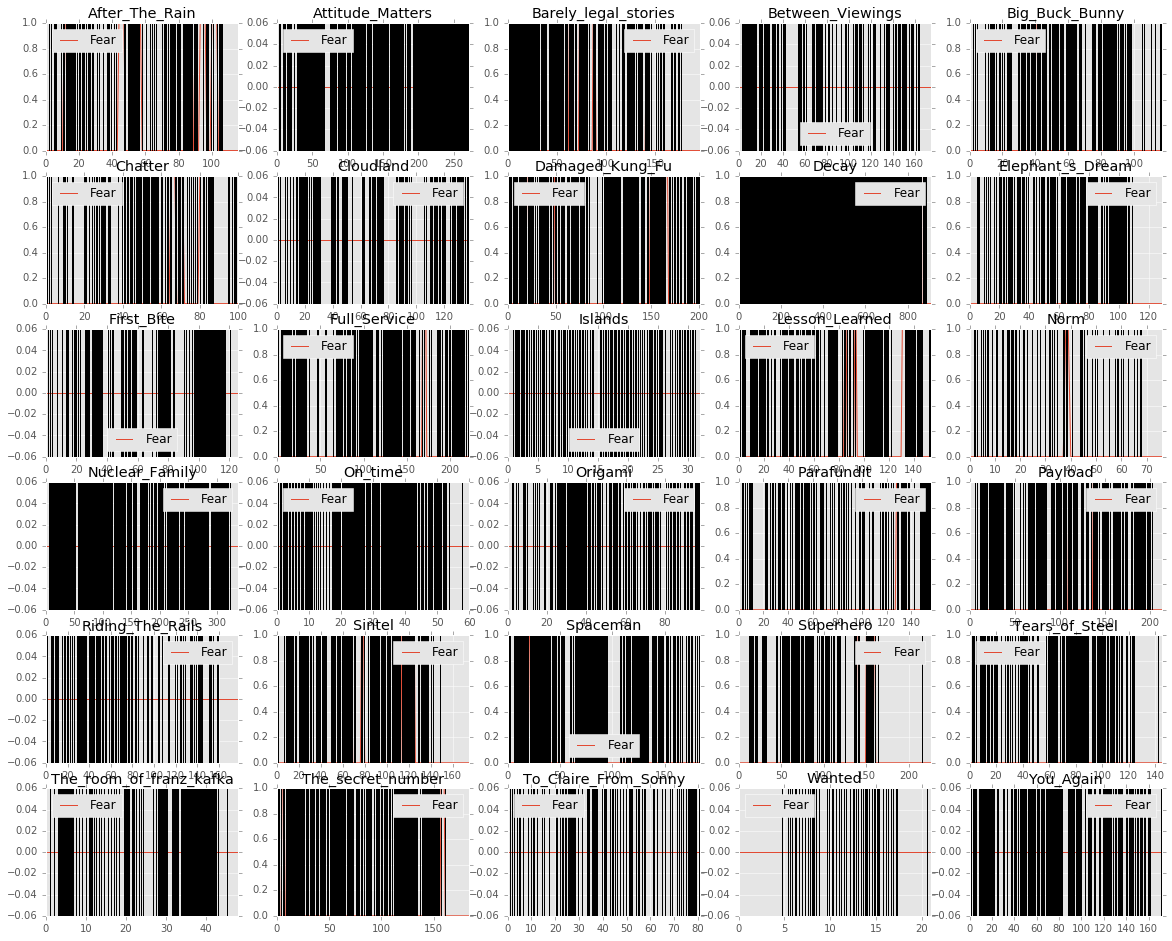

In [27]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)
    df = getFearDf(mov)
    df[['Fear']].plot(ax=plt.gca(),title=mov)
    cuts = getShotDf(mov)['time']
    for i in range(len(cuts)):
        x=cuts[i]/5   ## conversion of time to sliding windows with 5 
        plt.axvline(x,linestyle='-',color='black')


## Valence Arousal Annotations

In [28]:
def getAnnotationDf(movname,folder=med2017annotationsFolder):
    filename = os.path.join(folder, movname + '-MEDIAEVAL2017-valence_arousal.txt')
    annotation = np.genfromtxt(filename, names=True, delimiter='\t', dtype=None)
    df = pd.DataFrame(annotation)
    return df

In [29]:
#df = getAnnotationDf(movieNames[0])
#df.hist(alpha=0.5,bins=50)#df.head()
#df.describe()
#df = getAnnotationDf('Islands')
#df.head()

## Valence, Arousal histogram plots for Dev-Set

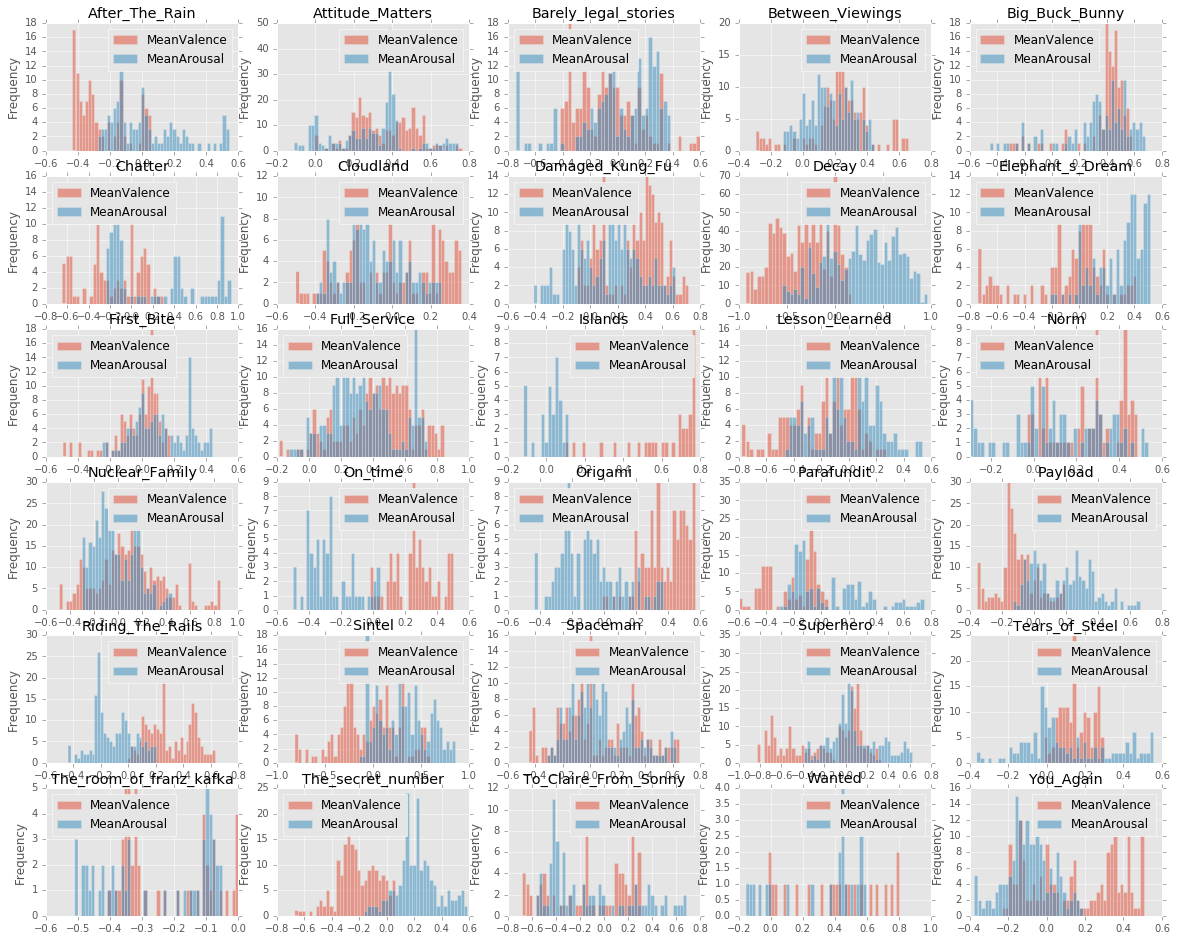

In [83]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)    
    df = getAnnotationDf(mov)
    df[['MeanValence','MeanArousal']].plot.hist(ax=plt.gca(),title=mov,alpha=0.5,bins=50)

## Valence , Arousal plots for Dev-Set

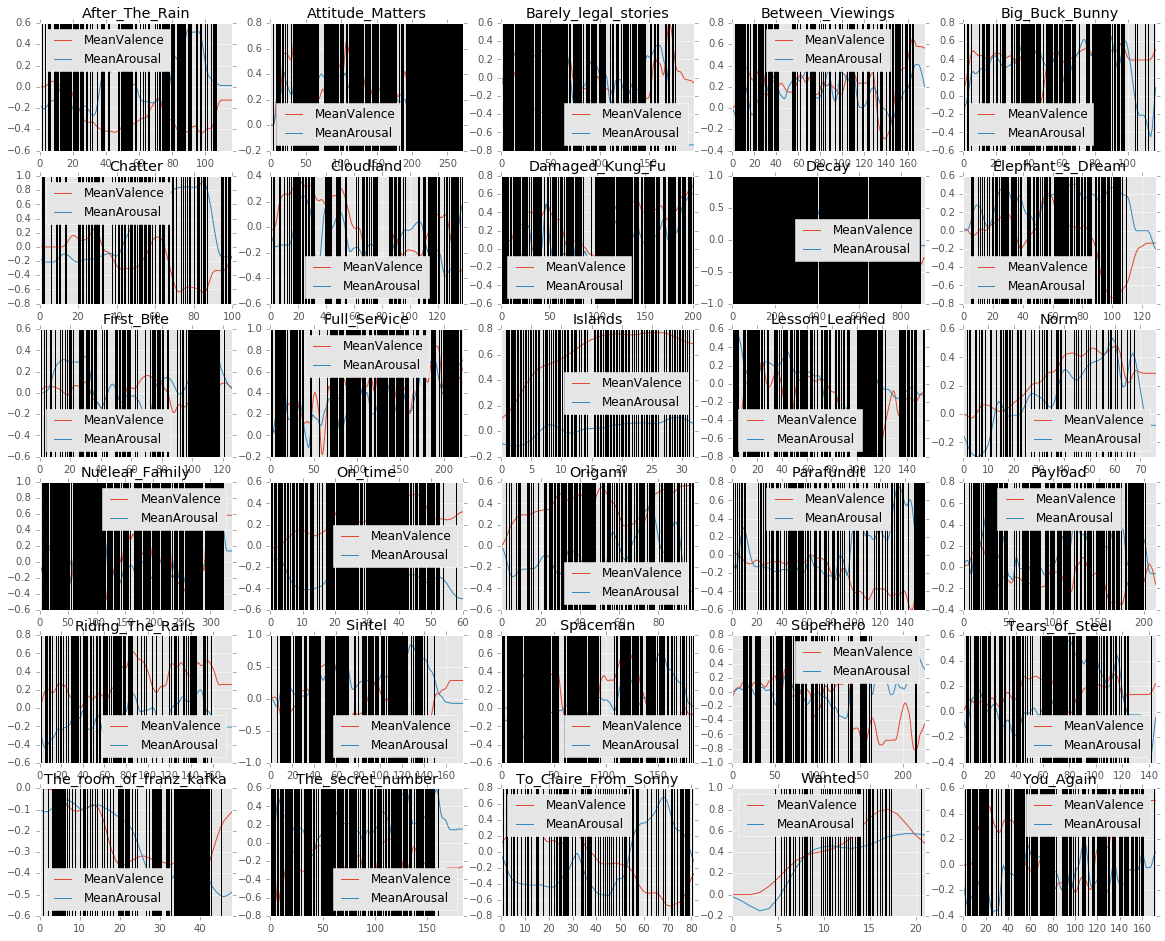

In [86]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)
    df = getAnnotationDf(mov)
    df[['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=mov)
    cuts = getShotDf(mov)['time']
    for i in range(len(cuts)):
        x=cuts[i]/5
        plt.axvline(x,linestyle='-',color='black')

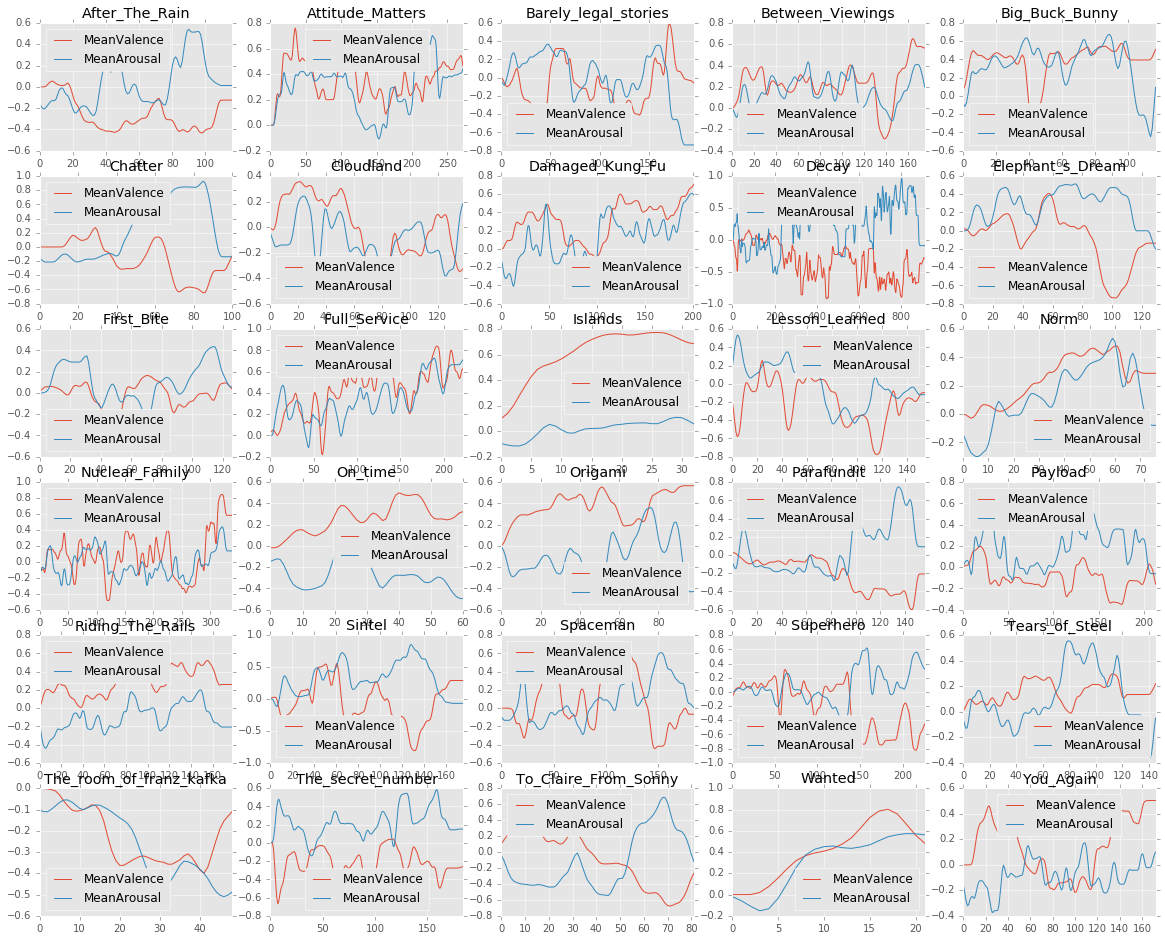

In [84]:
fix, axes = plt.subplots(figsize=(20,16))
for ii, mov in enumerate(movieNames):
    plt.subplot(6,5,ii+1)
    df = getAnnotationDf(mov)
    df[['MeanValence','MeanArousal']].plot(ax=plt.gca(),title=mov)
    #.hist(alpha=0.5,bins=50)


## Audio Features


In [30]:
def getAudioDf(moviename,folder=med2017audiofolder):
    if 'TestSet' in folder:
        files = glob.glob(folder+moviename+'/audio_features/*.csv')
    else:
        files = glob.glob(folder+moviename+'/*.csv')
    files = sorted(files)
    files
    alist = []
    for fname in files:
        f=open(fname,'r')
        h = []
        for l in f :
            if '@attribute' in l:
                h.append(l.split()[1])
            elif l == '\n':
                l
            elif l[0] =='@':
                l
            else:
                alist.append(map(float,l.split(',')[1:])) #first attribute is string ,skipped
        f.close()
    
    return pd.DataFrame(alist,columns=h[1:])

## Visual Features

In [31]:
visual_feat = ['acc', 'cedd', 'cl', 'eh', 'fc6', 'fcth', 
               'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]
visual_feat_wofc16 = ['acc', 'cedd', 'cl', 'eh', 'fcth', 
               'gabor', 'jcd', 'lbp', 'sc', 'tamura'   ]

In [32]:
def getVisFeatureDf(moviename,typename,folder=med2017visualFeaturesfolder):
    files = glob.glob(folder+moviename+'/'+typename+'/*.txt')
    files = sorted(files)
    alist = []
    for fname in files:
        f=open(fname,'r')
        for l in f:
            alist.append(map(float,l.split(',')))
        f.close()
    return pd.DataFrame(alist)

def getAvgVisFeatureDf(moviename,typename,folder=med2017visualFeaturesfolder):
    df = getVisFeatureDf(moviename,typename,folder)
    dfwindow = df.rolling(10).mean()[9::5] ############### start with 9
    dfwindow.reset_index(inplace=True)
    dfwindow.drop('index',axis=1,inplace=True)
    return dfwindow

def getAvgVisFeatListDf(moviename,featlist,folder=med2017visualFeaturesfolder):
    df = getVisFeatureDf(moviename,featlist[0],folder)
    for feat in featlist[1:]:
        tdf = getVisFeatureDf(moviename,feat,folder)
        df = pd.concat([df,tdf],axis=1)
    
    dfwindow = df.rolling(10).mean()[9::5] ############### start with 9
    dfwindow.reset_index(inplace=True)
    dfwindow.drop('index',axis=1,inplace=True)
    dfwindow.columns=list(range(len(dfwindow.columns)))
    return dfwindow

In [33]:
sum([len(getAnnotationDf(m)) for m in movieNames ])

5274

In [34]:
sum([len(getAudioDf(m)) for m in movieNames ])

5264

In [35]:
sum([len(getVisFeatureDf(m,'cl')) for m in movieNames ])

26589

In [36]:
sum([len(getAvgVisFeatureDf(m,'cl')) for m in movieNames ])

5276

In [37]:
df = getVisFeatureDf(movieNames[0],'cl')
#df = getAvgVisFeatureDf(movieNames[0],'cl')
#df = getAvgVisFeatListDf(movieNames[0],['cl','eh'])
#df.hist()
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,2.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,16.0,16.0,16.0,16.0,32.0,16.0,16.0,16.0,16.0,16.0
1,2.0,15.0,15.0,16.0,16.0,16.0,15.0,15.0,15.0,16.0,...,16.0,16.0,16.0,16.0,31.0,16.0,16.0,16.0,16.0,16.0
2,15.0,16.0,14.0,14.0,16.0,16.0,16.0,15.0,16.0,15.0,...,16.0,15.0,16.0,16.0,21.0,15.0,16.0,16.0,16.0,16.0
3,6.0,17.0,15.0,8.0,16.0,12.0,18.0,16.0,16.0,16.0,...,15.0,15.0,16.0,15.0,27.0,15.0,16.0,17.0,15.0,17.0
4,3.0,16.0,15.0,11.0,16.0,12.0,16.0,16.0,15.0,16.0,...,16.0,15.0,16.0,15.0,30.0,16.0,16.0,17.0,16.0,16.0
5,4.0,14.0,16.0,13.0,15.0,13.0,16.0,15.0,16.0,15.0,...,15.0,16.0,15.0,15.0,29.0,16.0,16.0,16.0,16.0,16.0
6,3.0,14.0,16.0,13.0,15.0,12.0,16.0,15.0,16.0,15.0,...,16.0,16.0,16.0,16.0,31.0,16.0,16.0,16.0,16.0,16.0
7,4.0,14.0,16.0,13.0,15.0,12.0,16.0,15.0,16.0,15.0,...,16.0,16.0,16.0,16.0,31.0,16.0,16.0,16.0,16.0,16.0
8,4.0,14.0,16.0,13.0,15.0,12.0,16.0,15.0,16.0,15.0,...,16.0,16.0,16.0,16.0,31.0,16.0,16.0,16.0,16.0,16.0
9,3.0,15.0,16.0,13.0,15.0,12.0,16.0,15.0,16.0,15.0,...,16.0,16.0,16.0,16.0,31.0,16.0,16.0,16.0,16.0,16.0


In [30]:
#df = getAvgVisFeatListDf(movieNames[0],['fc6'])
#df = getVisFeatureDf(movieNames[0],'fc6')
#df.describe()

## Low Level Cinematographic Features
fps değerlerine göre, feature çıkarma key frame seçme ve averaging tekrar yapılacak.

In [38]:
def getLowFeatureDf(movname):
    fname = movname +'.mp4continous_features.txt'
    df = pd.DataFrame(np.genfromtxt( os.path.join(pathcontfeatures,fname)))
    df.columns = ['time','framemean','huemean','satmean','valmean', 'redmean','greenmean','bluemean', 'lummean','motion']
    return df

def getLowFeature10SecDf(movname):
    pdf = getLowFeatureDf(movname)
    fps = getfps(movname)
    dfwindow = pdf.rolling(10).mean()[9::5]
    dfwindow.reset_index(inplace=True)
    dfwindow.drop('index',axis=1,inplace=True)
    dfwindow.drop('time',axis=1,inplace=True)
    return dfwindow

def getMovieListLowFeatFearDf(movieNames):
    X = getLowFeature10SecDf(movieNames[0])
    y = getFearDf(movieNames[0]).Fear[:len(X)]

    for mov in movieNames[1:]:
        tX=getLowFeatureDf(mov)
        ty=getFearDf(mov).Fear[:len(tX)]
        X = X.append(tX)
        y = y.append(ty)
        if (X.shape != y.shape):
            print mov, X.shape, y.shape
    return X,y

In [39]:
#getLowFeatureDf(movieNames[1]).head(10)[2::2]

In [40]:
#print getLowFeatureDf(movieNames[1]).head(10)
#print getLowFeatureDf(movieNames[1]).head(10).mean()
print getLowFeature10SecDf(movieNames[1]).head(10)

   framemean    huemean     satmean     valmean    redmean  greenmean  \
0       11.0  16.266390  108.533860   24.615390   5.417613   5.983095   
1        9.5  10.111689   65.248124   15.309475   7.196943   7.676144   
2       14.1   7.779963   10.971608   15.279160  14.210921  14.116898   
3       54.6  31.491614   36.296284   59.702565  52.819005  54.486605   
4       79.8  47.335400   74.969860   89.290460  75.284470  79.210160   
5       70.7  46.443380   82.062840   80.176950  66.029620  69.923720   
6       73.1  49.213990   78.506800   82.417040  69.214910  72.537860   
7       75.4  45.503130   70.678890   83.767210  70.378780  75.304340   
8       79.0  31.727480   83.240130   92.335810  65.965150  76.843300   
9       84.5  24.291420  101.637440  103.255080  66.305130  79.824300   

     bluemean  lummean     motion  
0   24.605360      0.7  26.035474  
1   15.304023      0.1   4.688359  
2   14.986898      6.0  10.187818  
3   57.096935     50.0  15.618866  
4   84.692030   

## Train and Test set creation

In [41]:
def getFeatureswFearDf(movieNames,featlist=visual_feat_wofc16):
    Xv = getAvgVisFeatListDf(movieNames[0],featlist)
    Xa = getAudioDf(movieNames[0])
    Xd = getAvgVisFeatListDf(movieNames[0],['fc6'])
    Xl = getLowFeature10SecDf(movieNames[0])
    y = getFearDf(movieNames[0])[['Fear']]
    
    mlen = min(len(Xv),len(Xa), len(Xd), len(Xl),len(y))
    
    Xv = Xv[:mlen]
    Xa = Xa[:mlen]
    Xd = Xd[:mlen]
    Xl = Xl[:mlen]
    y  = y[:mlen]
    
    for mov in movieNames[1:]:
        tXv = getAvgVisFeatListDf(mov,featlist)
        tXa = getAudioDf(mov)
        tXd = getAvgVisFeatListDf(mov,['fc6'])
        tXl = getLowFeature10SecDf(mov)
        ty = getFearDf(mov)[['Fear']]
        
        mlen = min(len(tXv),len(tXa),len(tXd),len(ty))
        tXv = tXv[:mlen]
        tXa = tXa[:mlen]
        tXd = tXd[:mlen]
        tXl = tXl[:mlen]
        ty = ty[:mlen]
        
        Xv  = Xv.append(tXv)
        Xa  = Xa.append(tXa)
        Xd = Xd.append(tXd)
        Xl = Xl.append(tXl)
        y  = y.append(ty)
        
    return Xv,Xa,Xd,Xl,y

In [42]:
def getFeatureswAnnotationsDf(movieNames,featlist=visual_feat_wofc16,folder=med2017visualFeaturesfolder):
    Xv = getAvgVisFeatListDf(movieNames[0],featlist,folder)
    Xa = getAudioDf(movieNames[0],folder)
    Xd = getAvgVisFeatListDf(movieNames[0],['fc6'],folder)
    Xl = getLowFeature10SecDf(movieNames[0])
    y = getAnnotationDf(movieNames[0])[['MeanValence','MeanArousal']]
    
    mlen = min(len(Xv),len(Xa), len(Xd), len(Xl),len(y))
    
    Xv = Xv[:mlen]
    Xa = Xa[:mlen]
    Xd = Xd[:mlen]
    Xl = Xl[:mlen]
    y = y[:mlen]
    
    for mov in movieNames[1:]:
        tXv = getAvgVisFeatListDf(mov,featlist)
        tXa = getAudioDf(mov)
        tXd = getAvgVisFeatListDf(mov,['fc6'])
        tXl = getLowFeature10SecDf(mov)
        ty = getAnnotationDf(mov)[['MeanValence','MeanArousal']]
        
        mlen = min(len(tXv),len(tXa),len(tXd),len(ty))
        tXv = tXv[:mlen]
        tXa = tXa[:mlen]
        tXd = tXd[:mlen]
        tXl = tXl[:mlen]
        ty = ty[:mlen]
        
        Xv  = Xv.append(tXv)
        Xa  = Xa.append(tXa)
        Xd = Xd.append(tXd)
        Xl = Xl.append(tXl)
        y  = y.append(ty)
        
    return Xv,Xa,Xd,Xl,y

In [43]:
def getMovListAudioVisFeatListwAnnotationsDf(movieNames,featlist):
    Xv = getAvgVisFeatureDf(movieNames[0],featlist[0])
    Xa = getAudioDf(movieNames[0])
    y = getAnnotationDf(movieNames[0])[['MeanValence','MeanArousal']]
    
    mlen = min(len(Xv),len(Xa),len(y))
    print(mlen)
    
    Xv = Xv[:mlen]
    Xa = Xa[:mlen]
    y = y[:mlen]
    
    for feattype in featlist[1:]:
        fXv = getAvgVisFeatureDf(movieNames[0],feattype)[:mlen]
        Xv = pd.concat( [Xv,fXv], axis=1 )

    for mov in movieNames[1:]:
        tXv = getAvgVisFeatureDf(mov,featlist[0])
        tXa = getAudioDf(mov)
        ty = getAnnotationDf(mov)[['MeanValence','MeanArousal']]
        
        mlen = min(len(tXv),len(tXa),len(ty))
        print(mlen)
        
        tXv = tXv[:mlen]
        tXa = tXa[:mlen]
        ty = ty[:mlen]
        
        for feattype in featlist[1:]:
            fXv = getAvgVisFeatureDf(mov,feattype)[:mlen]
            tXv = pd.concat( [tXv,fXv], axis=1 )
        
        Xv  = Xv.append(tXv)
        Xa  = Xa.append(tXa)
        y  = y.append(ty)
        
    return Xv,Xa,y

In [44]:
def df2mat(df):
    return df.as_matrix().reshape((len(df),))


# Classification work

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#from sklearn import cross_validation
from sklearn import metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams


In [52]:
def getGridCV(pipe,paramgirid,Xtrain,ytrain): # scoring ?
    grid = GridSearchCV(pipe, param_grid, cv=5,n_jobs=125)
    grid.fit(Xtrain,ytrain)
    
    return grid


In [47]:
def modelfit(alg, X, y, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X, y)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, X, y, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(y.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, X.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [48]:
trainlist, testlist=gettraintestmovielist(2,mov2groups)  # index 1 olanları test , diğerlerini train yapan fonksiyon

In [49]:
tXv,tXa,tXd,tXl,ty = getFeatureswFearDf(trainlist)
print(tXv.shape,tXa.shape,tXd.shape,tXl.shape,ty.shape)

((4526, 1271), (4526, 1583), (4526, 4096), (4526, 9), (4526, 1))


In [50]:
testXv, testXa, testXd,testXl, testy = getFeatureswFearDf(testlist)
print(testXv.shape, testXa.shape,testXd.shape, testXl.shape, testy.shape)

((738, 1271), (738, 1583), (738, 4096), (738, 9), (738, 1))


# Grid-Search cross validation Logistic Regression

In [56]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline



pipe = make_pipeline(LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid_visual = GridSearchCV(pipe, param_grid, cv=5,n_jobs=-1)
grid_visual.fit(tXv, ty)

grid_audio = GridSearchCV(pipe, param_grid, cv=5,n_jobs=-1)
grid_audio.fit(tXa, ty)


CPU times: user 15.2 s, sys: 344 ms, total: 15.5 s
Wall time: 5min 42s


In [57]:
print("Best cross-validation score: {:.2f}".format(grid_visual.best_score_))
print("Best parameters: ", grid_visual.best_params_)

print("Best cross-validation score: {:.2f}".format(grid_audio.best_score_))
print("Best parameters: ", grid_audio.best_params_)


Best cross-validation score: 0.82
('Best parameters: ', {'logisticregression__C': 0.001})
Best cross-validation score: 0.91
('Best parameters: ', {'logisticregression__C': 0.001})


In [60]:
predictionsv = LogisticRegression(C=0.001).fit(tXv, ty).predict(testXv)
predictionsa = LogisticRegression(C=0.001).fit(tXa, ty).predict(testXa)
predictionsd = LogisticRegression(C=0.001).fit(tXd, ty).predict(testXd)
predictionsl = LogisticRegression(C=0.001).fit(tXl, ty).predict(testXl)

print('Logistic Regression:\n {}\n'.format(metrics.classification_report(predictionsv,testy)))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(predictionsa,testy))) 
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(predictionsd,testy)))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(predictionsl,testy))) 

Logistic Regression:
              precision    recall  f1-score   support

          0       0.99      0.96      0.98       733
          1       0.00      0.00      0.00         5

avg / total       0.99      0.96      0.97       738


Logistic Regression:
              precision    recall  f1-score   support

          0       1.00      0.96      0.98       736
          1       0.00      0.00      0.00         2

avg / total       0.99      0.96      0.98       738


Logistic Regression:
              precision    recall  f1-score   support

          0       0.99      0.96      0.98       730
          1       0.04      0.12      0.06         8

avg / total       0.98      0.95      0.97       738


Logistic Regression:
              precision    recall  f1-score   support

          0       1.00      0.96      0.98       738
          1       0.00      0.00      0.00         0

avg / total       1.00      0.96      0.98       738




In [147]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}

pipegrad = GradientBoostingClassifier(learning_rate=0.05, 
                           n_estimators=60,max_depth=9,
                           max_features='sqrt', subsample=0.8, 
                           random_state=10) 

gsearch3 = GridSearchCV(pipegrad , param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
#gsearch3.fit(Xtraina,ytrain)
#gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

In [ ]:

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler()],
     'classifier__gamma': [0.001, 0.01, 1, 10],
     'classifier__C': [0.01, 1, 10,100]},
    {'classifier': [RandomForestClassifier],
     'preprocessing': [None],
     'classifier__n_estimators': [50,100,300]
     'classifier__max_features': [3,5,10]}]

grid = GridSearchCV(pipe, param_grid, cv=5)
#grid.fit(Xtraina,ytrain)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
#grid.grid_scores_, grid.best_params_, grid.best_score_

In [149]:
from joblib import Parallel, delayed

import multiprocessing
#what are your inputs, and what operation do you want to
#perform on each input. For example...

def trainPipe(ii,pipe,valorar, modality):
    
    #rows = []
    trainlist, testlist=gettraintestmovielist(ii,mov2groups)  # index 1 olanları test , diğerlerini train yapan fonksiyon
    tXv,tXa,tXd,ty = getFeatureswAnnotationsDf(trainlist)
    print(tXv.shape,tXa.shape,tXd.shape,ty.shape)
    testXv, testXa, testXd, testy = getFeatureswAnnotationsDf(testlist)
    print(testXv.shape, testXa.shape,testXd.shape, testy.shape)

    if modality == 'visual':
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXv,ty[[valorar]], 
                                           testXv, testy[[valorar]])
    else:
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXa,ty[[valorar]], 
                                           testXa, testy[[valorar]])
        
    return ii,mse,prs,p1

def processGroup(ii,pipe,valorar, modality):
    
    #rows = []
    trainlist, testlist=gettraintestmovielist(ii,mov2groups)  # index 1 olanları test , diğerlerini train yapan fonksiyon
    tXv,tXa,tXd,ty = getFeatureswAnnotationsDf(trainlist)
    print(tXv.shape,tXa.shape,tXd.shape,ty.shape)
    testXv, testXa, testXd, testy = getFeatureswAnnotationsDf(testlist)
    print(testXv.shape, testXa.shape,testXd.shape, testy.shape)

    if modality == 'visual':
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXv,ty[[valorar]], 
                                           testXv, testy[[valorar]])
    else:
        y_pred_test,mse,prs,p1 = evaluate_pipe(pipe, 
                                           tXa,ty[[valorar]], 
                                           testXa, testy[[valorar]])
        
    return [ii,mse,prs]

def crossgroups(pipe,valorar,modality):
    #inputs=range(len(movgroups))
    inputs=[1, 2, 3, 4, 5]
    num_cores = multiprocessing.cpu_count()
    results = Parallel(n_jobs=num_cores)(delayed(processGroup)(i,pipe,valorar,modality) for i in inputs)
    pipescores = pd.DataFrame(results,columns=['test-group','MSE','PCC'])

    return pipescores


In [47]:
from sklearn.model_selection import train_test_split, cross_val_score


#trainlist, testlist=gettraintest2movielist(2)  # index X olanları test , diğerlerini train yapan fonksiyon
trainlist, testlist=gettraintestmovielist(2)  # index X olanları test , diğerlerini train yapan fonksiyon

# movieNames,testmovieNames
#tXv,tXa,tXd,tXl,ty = getFeatureswAnnotationsDf(movieNames)
print(tXv.shape,tXa.shape,tXd.shape,tXl.shape,ty.shape)

#training on whole dev set
### this test group will not be used for 
testXv, testXa, testXd, testXl, testy = getFeatureswAnnotationsDf(testlist)
#testXv, testXa, testXd, testXl, testy = getFeatureswAnnotationsDf(testmovieNames)
print(testXv.shape, testXa.shape,testXd.shape,testXd.shape, testy.shape)



In [155]:
X_train, X_test, y_train, y_test = train_test_split(tXv, ty,test_size=0.2, random_state=0)

In [156]:
Xa_train, Xa_test, ya_train, ya_test = train_test_split(tXa, ty,test_size=0.2, random_state=0)

In [157]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(tXd, ty,test_size=0.2, random_state=0)

In [158]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(tXl, ty,test_size=0.2, random_state=0)
Xl_train.shape, Xl_test.shape, yl_train.shape, yl_test.shape

((3620, 9), (906, 9), (3620, 1), (906, 1))

((22, 1583), (22, 1271), (22, 4096), (22, 9))
(22, 4)


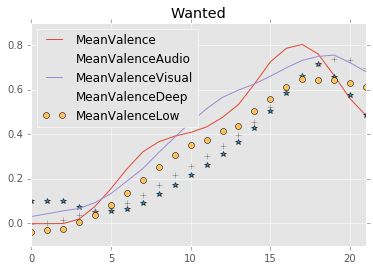

In [131]:
mov = 'Wanted'
df = predictEmo(mov)
dfa = getAnnotationDf(mov)
print dfa.shape

dfa[['MeanValence']].plot(ax=plt.gca(),title=mov)

df[['MeanValenceAudio']].plot(ax=plt.gca(), style=['*'], title=mov)
df[['MeanValenceVisual']].plot(ax=plt.gca(), style=['-'], title=mov)
df[['MeanValenceDeep']].plot(ax=plt.gca(), style=['+'], title=mov)
df[['MeanValenceLow']].plot(ax=plt.gca(), style=['o'], title=mov)


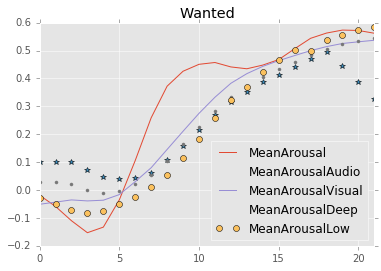

In [136]:
dfa[['MeanArousal']].plot(ax=plt.gca(),title=mov)

df[['MeanArousalAudio']].plot(ax=plt.gca(), style=['*'], title=mov)
df[['MeanArousalVisual']].plot(ax=plt.gca(), style=['-'], title=mov)
df[['MeanArousalDeep']].plot(ax=plt.gca(), style=['.'], title=mov)
df[['MeanArousalLow']].plot(ax=plt.gca(), style=['o'], title=mov)
